In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
course_info = pd.read_csv('datasets/cv_course_info.csv')

In [5]:
course_info.head()

,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type,status
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,TRC.2016,2016,1,NaN,0,0,0,0,45,invited_selfreg,selfpace,1
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),CU.MOOC.0001,2016,2,NaN,1483491600,1496249999,1483491600,1485881999,14,invited_selfreg,selfpace,1
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,TRC.ELearning,2017,1,NaN,1501779600,1528736399,0,0,50,purchase_to_enroll,weekly,1
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,CU.MOOC.0002,2017,1,อ. ดร.ทรงศักดิ์ หมัดสะและ,1504803600,1509469199,1504803600,1508086799,100,purchase_to_enroll,selfpace,1
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,CU.MOOC.0003,2017,1,ผศ. ดร.พิมพ์พนา ปีตธวัชชัย,1504803600,1509469199,1504803600,1508086799,2000,free_selfreg,selfpace,1


In [6]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cv_cid             175 non-null    object
 1   course_title       175 non-null    object
 2   course_no          175 non-null    object
 3   year               175 non-null    int64 
 4   semester           175 non-null    int64 
 5   instructor_string  159 non-null    object
 6   course_start       175 non-null    int64 
 7   course_end         175 non-null    int64 
 8   reg_start          175 non-null    int64 
 9   reg_end            175 non-null    int64 
 10  roster_limit       175 non-null    int64 
 11  reg_workflow       175 non-null    object
 12  course_type        175 non-null    object
 13  status             175 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 19.3+ KB


In [7]:
course_info.drop('status', axis=1, inplace=True)

In [8]:
# timestamp = 0 means no start/end time
def to_datetime(t):
    if t != 0:
        return pd.to_datetime(t, unit='s')+pd.Timedelta('7H')
        
    return t

In [9]:
course_info['course_start'] = course_info['course_start'].apply(to_datetime)
course_info['course_end'] = course_info['course_end'].apply(to_datetime)
course_info['reg_start'] = course_info['reg_start'].apply(to_datetime)
course_info['reg_end'] = course_info['reg_end'].apply(to_datetime)

In [10]:
course_info.head()

,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,TRC.2016,2016,1,NaN,0,0,0,0,45,invited_selfreg,selfpace
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),CU.MOOC.0001,2016,2,NaN,2017-01-04 08:00:00,2017-05-31 23:59:59,2017-01-04 08:00:00,2017-01-31 23:59:59,14,invited_selfreg,selfpace
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,TRC.ELearning,2017,1,NaN,2017-08-04 00:00:00,2018-06-11 23:59:59,0,0,50,purchase_to_enroll,weekly
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,CU.MOOC.0002,2017,1,อ. ดร.ทรงศักดิ์ หมัดสะและ,2017-09-08 00:00:00,2017-10-31 23:59:59,2017-09-08 00:00:00,2017-10-15 23:59:59,100,purchase_to_enroll,selfpace
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,CU.MOOC.0003,2017,1,ผศ. ดร.พิมพ์พนา ปีตธวัชชัย,2017-09-08 00:00:00,2017-10-31 23:59:59,2017-09-08 00:00:00,2017-10-15 23:59:59,2000,free_selfreg,selfpace


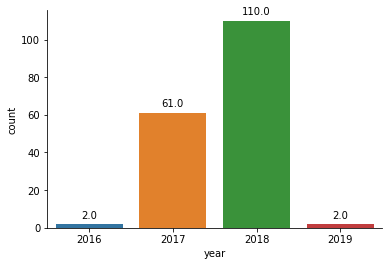

In [11]:
# courses in one year count
ax = sns.countplot(course_info['year'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

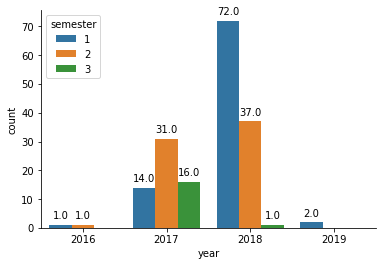

In [12]:
# courses in one year count with sem as legend
ax = sns.countplot(course_info['year'], hue=course_info['semester'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

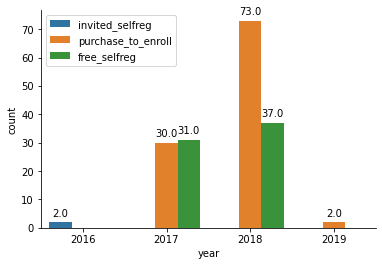

In [13]:
# courses in one year count with reg_workflow as legend
ax = sns.countplot(course_info['year'], hue=course_info['reg_workflow'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.legend(loc=2)

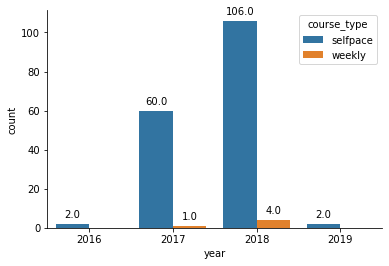

In [14]:
# courses in one year count with course_type as legend
ax = sns.countplot(course_info['year'], hue=course_info['course_type'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

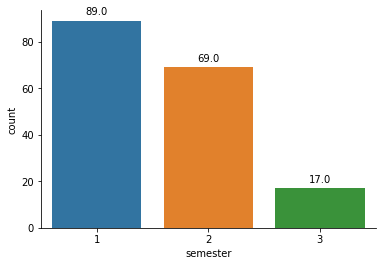

In [15]:
# courses in one sem count
ax = sns.countplot(course_info['semester'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

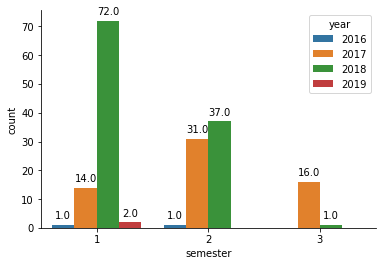

In [16]:
# courses in one sem count with year as legend
ax = sns.countplot(course_info['semester'], hue=course_info['year'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

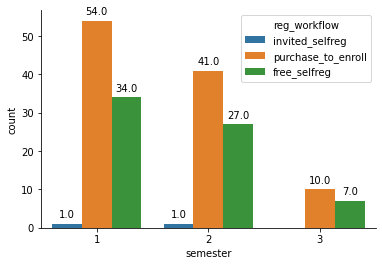

In [17]:
# courses in one sem count with reg_workflow as legend
ax = sns.countplot(course_info['semester'], hue=course_info['reg_workflow'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

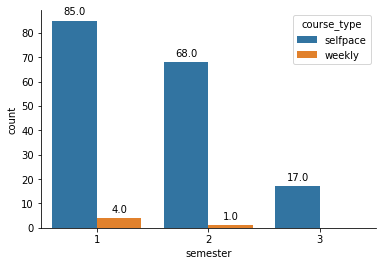

In [18]:
# courses in one sem count with course_type as legend
ax = sns.countplot(course_info['semester'], hue=course_info['course_type'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

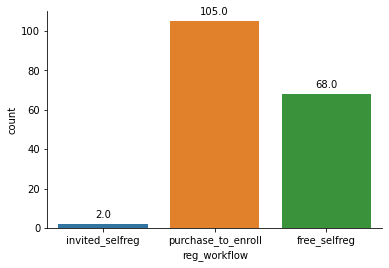

In [19]:
# courses in reg_workflow
ax = sns.countplot(course_info['reg_workflow'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

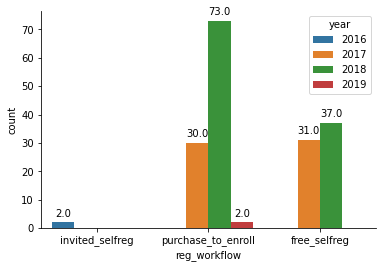

In [20]:
# courses in reg_workflow with year as legend
ax = sns.countplot(course_info['reg_workflow'], hue=course_info['year'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

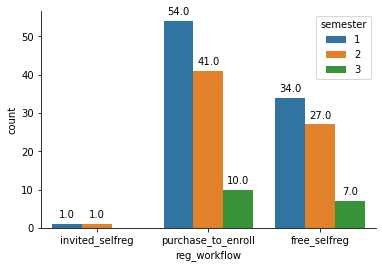

In [21]:
# courses in reg_workflow with sem as legend
ax = sns.countplot(course_info['reg_workflow'], hue=course_info['semester'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

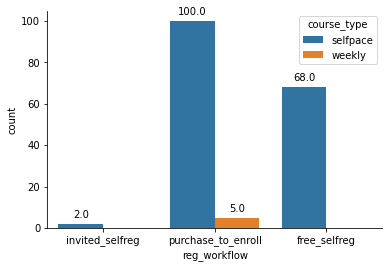

In [22]:
# courses in reg_workflow with course_type as legend
ax = sns.countplot(course_info['reg_workflow'], hue=course_info['course_type'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

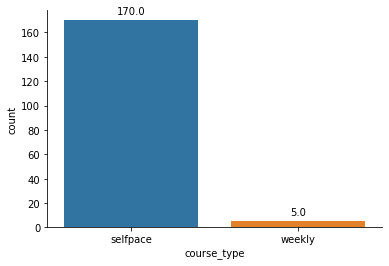

In [23]:
# courses in course_type
ax = sns.countplot(course_info['course_type'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

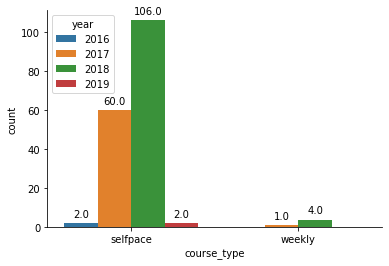

In [24]:
# courses in course_type with year as legend
ax = sns.countplot(course_info['course_type'], hue=course_info['year'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

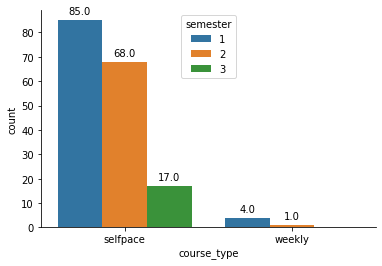

In [25]:
# courses in course_type with sem as legend
ax = sns.countplot(course_info['course_type'], hue=course_info['semester'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

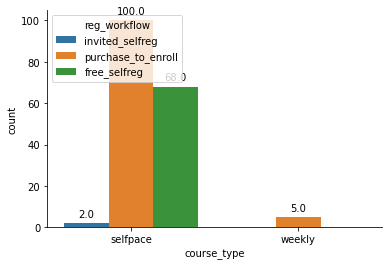

In [26]:
# courses in course_type with reg_workflow as legend
ax = sns.countplot(course_info['course_type'], hue=course_info['reg_workflow'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

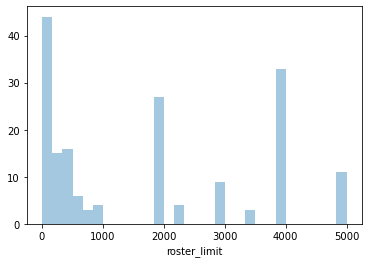

In [27]:
sns.distplot(course_info['roster_limit'], bins=30, kde=False)

In [28]:
def yes_no(row):
    if row == 0:
        return 'No'
    return 'Yes'

In [29]:
course_info['course_start'] = course_info['course_start'].apply(yes_no)
course_info['course_end'] = course_info['course_end'].apply(yes_no)
course_info['reg_start'] = course_info['reg_start'].apply(yes_no)
course_info['reg_end'] = course_info['reg_end'].apply(yes_no)

In [30]:
course_info.head()

,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,TRC.2016,2016,1,NaN,No,No,No,No,45,invited_selfreg,selfpace
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),CU.MOOC.0001,2016,2,NaN,Yes,Yes,Yes,Yes,14,invited_selfreg,selfpace
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,TRC.ELearning,2017,1,NaN,Yes,Yes,No,No,50,purchase_to_enroll,weekly
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,CU.MOOC.0002,2017,1,อ. ดร.ทรงศักดิ์ หมัดสะและ,Yes,Yes,Yes,Yes,100,purchase_to_enroll,selfpace
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,CU.MOOC.0003,2017,1,ผศ. ดร.พิมพ์พนา ปีตธวัชชัย,Yes,Yes,Yes,Yes,2000,free_selfreg,selfpace


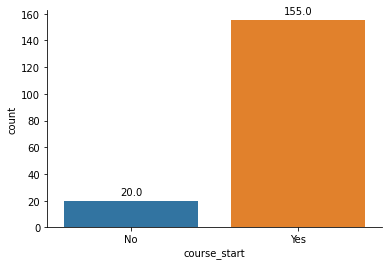

In [33]:
# have/not have course start time
ax = sns.countplot(course_info['course_start'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

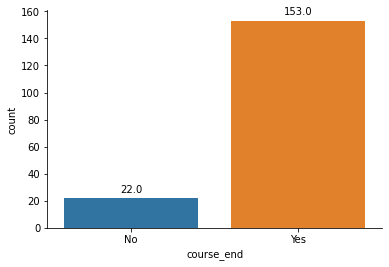

In [35]:
# have/not have course end time
ax = sns.countplot(course_info['course_end'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [38]:
# มี course ที่มีเวลาเปิดเรียน แต่ไม่มีเวลาปิดเรียน

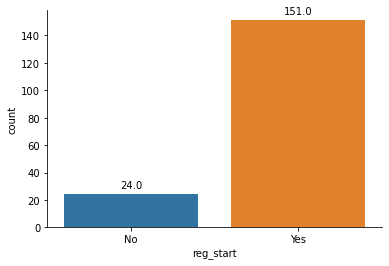

In [39]:
# have/not have reg start time
ax = sns.countplot(course_info['reg_start'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

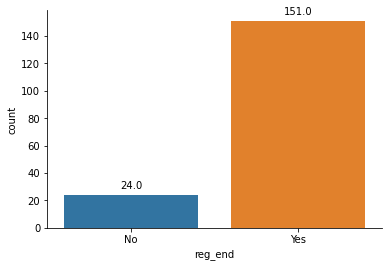

In [40]:
# have/not have reg end time
ax = sns.countplot(course_info['reg_end'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [41]:
# มี ครอสที่ไม่มีเวลาเปิด/ปิดรับสมัคร

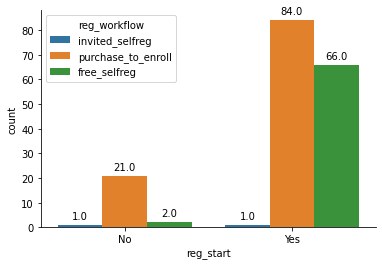

In [42]:
# have/not have reg start time
ax = sns.countplot(course_info['reg_start'], hue=course_info['reg_workflow'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [43]:
# ส่วนใหญ่ครอสที่ไม่มีเวลาเปิดปิดรับสมัครจะเป็นคอร์สที่ต้องเสียค่าเรียน

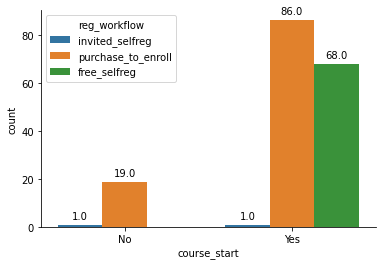

In [47]:
# have/not have course start time
ax = sns.countplot(course_info['course_start'], hue=course_info['reg_workflow'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

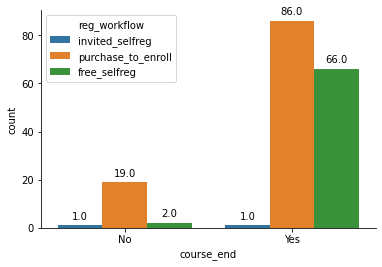

In [48]:
# have/not have course end time
ax = sns.countplot(course_info['course_end'], hue=course_info['reg_workflow'])
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [50]:
# ส่วนใหญ่คอร์สที่ไม่มีเวลาเปิดปิดเรียนจะเป็นคอร์สที่ต้องเสียค่าเรียน